<a href="https://colab.research.google.com/github/AlinaStudyPM/UniversityML/blob/main/MyML_Aglomerative_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install haversine

In [10]:
!pip install folium

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from haversine import haversine
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import folium

In [14]:
def calculate_distance(row):
  return 1000 * haversine((latitude_metro, longitude_metro), (row['LATITUDE'], row['LONGITUDE']))

In [2]:
data = pd.read_csv('ALL_SPB_STOPS.csv', encoding='CP1251', delimiter=';')
data

,ID_STOP,STOP_NAME,LATITUDE,LONGITUDE
0,100101,Пр.Ветеранов-1,59.841604,30.253984
1,100102,Пр.Ветеранов-2,59.842042,30.250084
2,100103,Ленинский пр.-1,59.851683,30.268385
3,100104,Ленинский пр.-2,59.849710,30.268348
4,100105,Автово,59.867292,30.261133
...,...,...,...,...
7149,4997,ЗАВОД ИМ. КАЛИНИНА [тест] <,59.950695,30.266132
7150,4998,МАЛЫЙ ПР. В.О. ПО 9 ЛИНИИ [тест] <,59.945698,30.271969
7151,5003,АДМИРАЛТЕЙСКИЙ ПР. [тест] <,59.936026,30.309259
7152,7069,ПР. ЛУНАЧАРСКОГО(тест),60.031439,30.392572


In [6]:
#Разделяем остановки на автобусные и метро
metro_stops = data[data['ID_STOP'].astype(str).str.startswith('100')]
auto_stops = data[~data['ID_STOP'].astype(str).str.startswith('100')]

In [7]:
metro_name = "Маяковская"
radius = 1000
metro_stop_info = metro_stops[metro_stops['STOP_NAME'].str.contains(metro_name)]
latitude_metro = metro_stop_info['LATITUDE'].values[0]
longitude_metro = metro_stop_info['LONGITUDE'].values[0]
metro_stop_info

,ID_STOP,STOP_NAME,LATITUDE,LONGITUDE
47,100304,Маяковская,59.931592,30.355142


In [15]:
#Для каждой автобусной остановки считаем расстояние до выбранного метро
auto_stops['Distance'] = auto_stops.apply(calculate_distance, axis=1)
auto_stops

<ipython-input-15-e16594860f44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_stops['Distance'] = auto_stops.apply(calculate_distance, axis=1)


,ID_STOP,STOP_NAME,LATITUDE,LONGITUDE,Distance
75,1282,"10 КМ [145, 165, 482, 482а, 482в, 484, 484б]",59.773372,30.125111,21784.100714
76,1285,12-13 ЛИНИИ (ПО СРЕДНЕМУ ПР. В.О.) [6],59.941121,30.271757,4764.235845
77,1287,18-19 ЛИНИИ [6],59.938798,30.264141,5132.274068
78,1290,"1-Я И КАДЕТСКАЯ ЛИНИЯ,УГ. СРЕДНЕГО ПР. [6]",59.944538,30.287008,4059.018984
79,1291,1-Я КРАСНОАРМЕЙСКАЯ УЛ. [71],59.915965,30.310436,3037.369714
...,...,...,...,...,...
7149,4997,ЗАВОД ИМ. КАЛИНИНА [тест] <,59.950695,30.266132,5393.442469
7150,4998,МАЛЫЙ ПР. В.О. ПО 9 ЛИНИИ [тест] <,59.945698,30.271969,4891.129809
7151,5003,АДМИРАЛТЕЙСКИЙ ПР. [тест] <,59.936026,30.309259,2603.194173
7152,7069,ПР. ЛУНАЧАРСКОГО(тест),60.031439,30.392572,11296.115270


In [16]:
#Оставляем только остановки на заданном расстоянии
nearby_auto_stops = auto_stops[auto_stops['Distance'] < radius]
nearby_auto_stops

,ID_STOP,STOP_NAME,LATITUDE,LONGITUDE,Distance
140,1377,"БКЗ ""ОКТЯБРЬСКИЙ""",59.936895,30.364611,791.183861
242,1476,"ДВОРЕЦ ТВОРЧЕСТВА ЮНЫХ [7, 3, 27, 22, 24]",59.933590,30.339277,911.337175
290,14902,"Пять углов (3, 8, 15)",59.926304,30.343023,895.383815
294,14907,"Владимирская площадь (3, 8, 15)",59.929517,30.347792,470.025637
296,14909,"Невский проспект (3, 8, 15)",59.933391,30.348150,437.907500
...,...,...,...,...,...
6882,4217,ЛИТЕЙНЫЙ ПР. (тест),59.933371,30.348068,440.952260
6883,4218,МАРИИНСКАЯ БОЛЬНИЦА (тест),59.934743,30.348238,520.295171
6886,4223,"УЛ. НЕКРАСОВА, 1",59.938938,30.349131,882.813789
6887,4243,УЛ. ВОССТАНИЯ (тест),59.938729,30.360935,856.725814


In [21]:
X = nearby_auto_stops[['LATITUDE', 'LONGITUDE']].values

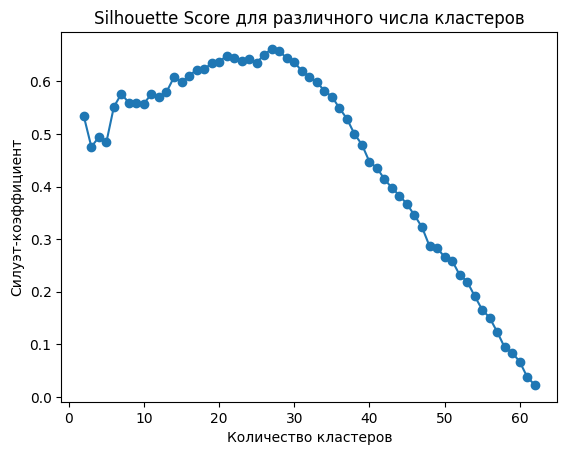

Оптимальное количество кластеров: 27


In [22]:
silhouette_scores = []
cluster_range = range(2, len(X))  # Измените диапазон по необходимости

for n_clusters in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Построение графика
plt.figure()
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Score для различного числа кластеров")
plt.xlabel("Количество кластеров")
plt.ylabel("Силуэт-коэффициент")
plt.show()

# Определите, где значение максимальное
optimal_n_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Оптимальное количество кластеров: {optimal_n_clusters}")

In [26]:
agg_clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters)

nearby_auto_stops['cluster'] = agg_clustering.fit_predict(X)
nearby_auto_stops

<ipython-input-26-bc98d73ac9cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nearby_auto_stops['cluster'] = agg_clustering.fit_predict(X)


,ID_STOP,STOP_NAME,LATITUDE,LONGITUDE,Distance,cluster
140,1377,"БКЗ ""ОКТЯБРЬСКИЙ""",59.936895,30.364611,791.183861,1
242,1476,"ДВОРЕЦ ТВОРЧЕСТВА ЮНЫХ [7, 3, 27, 22, 24]",59.933590,30.339277,911.337175,11
290,14902,"Пять углов (3, 8, 15)",59.926304,30.343023,895.383815,2
294,14907,"Владимирская площадь (3, 8, 15)",59.929517,30.347792,470.025637,9
296,14909,"Невский проспект (3, 8, 15)",59.933391,30.348150,437.907500,14
...,...,...,...,...,...,...
6882,4217,ЛИТЕЙНЫЙ ПР. (тест),59.933371,30.348068,440.952260,14
6883,4218,МАРИИНСКАЯ БОЛЬНИЦА (тест),59.934743,30.348238,520.295171,21
6886,4223,"УЛ. НЕКРАСОВА, 1",59.938938,30.349131,882.813789,8
6887,4243,УЛ. ВОССТАНИЯ (тест),59.938729,30.360935,856.725814,6


In [28]:
colors = [
    'red',
    'blue',
    'gray',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    'black',
    'darkred',
    'lightred'
]

In [30]:
map_stops_aglomerative = folium.Map(
    location=[latitude_metro, longitude_metro],
    zoom_start=15,
)

for i in range(optimal_n_clusters):
  cluster_data = nearby_auto_stops[nearby_auto_stops['cluster'] == i]
  for _, row in cluster_data.iterrows():
    folium.Marker(
        location=(row['LATITUDE'], row['LONGITUDE']),
        popup = 'Кластер ' + str(row['cluster']) + ': ' +row['STOP_NAME'],
        icon=folium.Icon(color=colors[i % 19])
        ).add_to(map_stops_aglomerative)
map_stops_aglomerative.save('Aglomerative_clusters.html')